In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('customer.csv')
data.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [4]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("custid", axis=1, inplace=True)
data.head()

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [5]:
patients = data.shape[0]
features = data.shape[1] - 1 

not_insured = len(data[data.health_ins == False])
insured = len(data[data.health_ins == True])
val = [not_insured, insured]

percentage_not_insured = (float(not_insured)/patients) * 100
percentage_insured = (float(insured)/patients) * 100

print(f'Total of patients:{patients}')
print(f'Total of columns:{features}')
print(f'Total of patients not insured:{percentage_not_insured}({percentage_not_insured:.2f}%)')
print(f'Total of patients insured:{percentage_insured}({percentage_insured:.2f}%)')

Total of patients:72458
Total of columns:12
Total of patients not insured:9.529658560821442(9.53%)
Total of patients insured:90.47034143917855(90.47%)


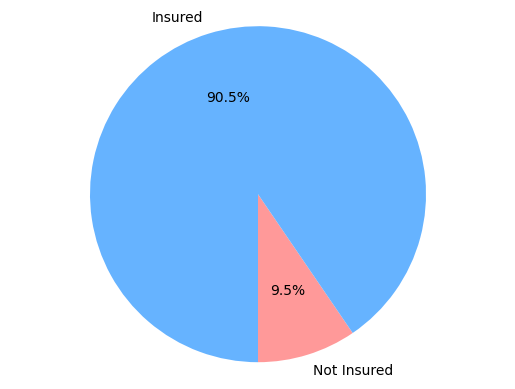

In [6]:
plt.pie(val, labels=["Not Insured", "Insured"], autopct='%1.1f%%', startangle=-90, colors=['#ff9999','#66b3ff'])
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.show()

In [7]:
data.columns

Index(['sex', 'is_employed', 'income', 'marital_status', 'health_ins',
       'housing_type', 'num_vehicles', 'age', 'state_of_res', 'code_column',
       'gas_usage', 'rooms', 'recent_move_b'],
      dtype='object')

In [8]:
data.isna().sum()

sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

In [9]:
data['is_employed'] = data['is_employed'].fillna(False)
data["is_employed"].unique()

/tmp/ipykernel_23185/299261139.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_employed'] = data['is_employed'].fillna(False)


array([ True, False])

In [10]:
data.isna().sum()

sex                  0
is_employed          0
income               0
marital_status       0
health_ins           0
housing_type      1686
num_vehicles      1686
age                  0
state_of_res         0
code_column          0
gas_usage         1686
rooms                0
recent_move_b     1687
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,Female,False,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,Female,False,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72452,Female,True,85000.0,Married,True,Homeowner with mortgage/loan,2.0,32,Wyoming,131,70.0,5,F
72453,Female,True,18500.0,Never married,False,Rented,1.0,25,Wyoming,131,10.0,4,F
72454,Female,False,20800.0,Widowed,True,Homeowner free and clear,1.0,86,Wyoming,131,120.0,6,F
72455,Male,True,75000.0,Married,True,Homeowner with mortgage/loan,2.0,50,Wyoming,131,90.0,3,F


In [13]:
np.sort(data["age"].unique())

array([  0,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96, 100,
       110, 114, 120])

In [15]:
(data['age'] == 0).sum()

np.int64(76)

In [16]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,is_employed,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,sex_Male,marital_status_Married,...,state_of_res_Tennessee,state_of_res_Texas,state_of_res_Utah,state_of_res_Vermont,state_of_res_Virginia,state_of_res_Washington,state_of_res_West Virginia,state_of_res_Wisconsin,state_of_res_Wyoming,recent_move_b_T
0,True,22000.0,True,0.0,24,1047,210.0,3,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,23200.0,True,0.0,82,1047,3.0,6,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,21000.0,True,2.0,31,1047,40.0,3,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,37770.0,True,1.0,93,1047,120.0,2,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,39000.0,True,2.0,67,1047,3.0,2,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from scipy.stats import zscore



In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(data_encoded)

# Step 5: Replace the original 'age' column with the imputed values
data['age'] = imputed_data[:, 4]

In [21]:
imputed_data

array([[1.00e+00, 2.20e+04, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 2.32e+04, 1.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 2.10e+04, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 2.08e+04, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 7.50e+04, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 2.22e+04, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [18]:
data['age'].unique()

array([ 24.,  82.,  31.,  93.,  67.,  76.,  26.,  73.,  27.,  54.,  61.,
        64.,  55.,  65.,  33.,  47.,  68.,  46.,  58.,  43.,  41.,  62.,
        21.,  78.,  32.,  59.,  29.,  70.,  30.,  28.,  86.,  35.,  34.,
        40.,  72.,  60.,  25.,  79.,  22.,  42.,  44.,  81.,  50.,  45.,
        63.,  57.,  39.,  71.,  38.,  49.,  69.,  37.,  66.,  53.,  36.,
        23.,  75.,  88.,  51.,  85.,  52.,  83.,  77.,  56.,  48., 100.,
        74.,  89.,  80.,  84.,   0.,  87., 120.,  91., 110., 114.,  94.,
        90.,  96.,  92.,  95.])

In [20]:
(data['age'] == 0).sum()

np.int64(76)